In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import ineqpy
import matplotlib.pyplot as plt
from os import path
import main as sugar

import time
from IPython.display import clear_output

runstorun = [0, 799] # lower and upper, both inclusive
runsfilename = f"sensitivity_analysis_runs_{runstorun[0]}_{runstorun[1]}.npy"
samplesfilename = "sensitivity_analysis_samples.npy"

In [2]:
# Define the model inputs
problem = {
    'num_vars': 6,
    'names': ['N agents', 'vision', 'Total initial sugar', 'Use Amsterdam map', "Use death", "Use instant regrowth"],
    'bounds': [[200, 1000], # NAgents
               [1, 10], #Vision
               [1, 10], #Total init sugar
               [0, 1], #Amsterdam map
               [0, 1], #Death
               [0, 1]] #Instant_regrowth
}

# load samples if exist, otherwise create
samples = None
if path.exists(samplesfilename):
    samples = np.load(samplesfilename)
    print("Samples found and loaded")
else:
    # Generate samples
    samples = saltelli.sample(problem, 100, calc_second_order=False) # 1000 samples
    np.save(samplesfilename, samples)
    print("Samples created and saved")

print(len(samples)," runs todo, first 10:\n",samples[:10])

Samples found and loaded
800  runs todo, first 10:
 [[3.75781250e+02 1.87011719e+00 5.66699219e+00 6.76757812e-01
  2.80273438e-01 9.07226562e-01]
 [2.36718750e+02 1.87011719e+00 5.66699219e+00 6.76757812e-01
  2.80273438e-01 9.07226562e-01]
 [3.75781250e+02 9.09472656e+00 5.66699219e+00 6.76757812e-01
  2.80273438e-01 9.07226562e-01]
 [3.75781250e+02 1.87011719e+00 5.50878906e+00 6.76757812e-01
  2.80273438e-01 9.07226562e-01]
 [3.75781250e+02 1.87011719e+00 5.66699219e+00 6.93359375e-02
  2.80273438e-01 9.07226562e-01]
 [3.75781250e+02 1.87011719e+00 5.66699219e+00 6.76757812e-01
  8.49609375e-02 9.07226562e-01]
 [3.75781250e+02 1.87011719e+00 5.66699219e+00 6.76757812e-01
  2.80273438e-01 2.54882812e-01]
 [2.36718750e+02 9.09472656e+00 5.50878906e+00 6.93359375e-02
  8.49609375e-02 2.54882812e-01]
 [7.75781250e+02 6.37011719e+00 1.16699219e+00 1.76757812e-01
  7.80273438e-01 4.07226562e-01]
 [6.36718750e+02 6.37011719e+00 1.16699219e+00 1.76757812e-01
  7.80273438e-01 4.07226562e-01

In [3]:
def runmodel(params):
    # set parameters
    N = int(round(params[0]))
    vision = int(round(params[1]))
    total_init_sugar = params[2]
    
    useamsmap = True
    if int(round(params[3])) == 0:
        useamsmap = False
    
    
    usedeath = True
    if int(round(params[4])) == 0:
        usedeath = False
    
    useinstantregrowth = True
    if int(round(params[5])) ==0:
        usedeath = False

    parameters = N, vision, total_init_sugar, useamsmap, usedeath, useinstantregrowth

    print(parameters)

    # run model
    df = sugar.main(parameters)
    df = df.reset_index()
    
    # extract gini from last timestep
    maxstep = max(df["Step"].tolist())
    wealth = np.array(df.loc[(df.Step == maxstep)]["Wealth"].tolist() )
    gini = ineqpy.gini(np.array(wealth))
    
    return gini

def runmodel(params):
#     time.sleep(1)
    return np.random.rand()

# print(runmodel(samples[10]))

In [4]:
# load runsfile if exists
runs = None
if path.exists(runsfilename):
    runs = np.load(runsfilename)
    print("Runs found and loaded")
else:
    runs = ["NaN"] * len(samples)
    np.save(runsfilename, runs)
    print("Runs file created and saved")

runs_todo = [i for i, x in enumerate(runs) if x == "NaN" and i >= runstorun[0] and i<= runstorun[1]]
print("current runs result: ", runs)
print("Runs todo: ", runs_todo)

Runs file created and saved
current runs result:  ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN

# Run simulations

In [5]:
calculation_durations = []
for i, run in enumerate(runs_todo):
    
    start = time.perf_counter()
    
    runs[run] = runmodel(samples[run])
    
    np.save(runsfilename, runs)
    
    stop =  time.perf_counter()
    calculation_durations.append(stop - start)
    
    clear_output(wait=False)
    
    print("Eta (seconds): ", round((len(runs_todo) - (i + 1)) * np.mean(calculation_durations)))
    print("Run done:      ", i+1, "/", len(runs_todo))

Eta (seconds):  0
Run done:       800 / 800


# Analysis

In [6]:
# load multiple runs files and merge

from os import listdir
from os.path import isfile, join


DATA_DIR = "D:/Documents/CLS/2021 Agent-based Modelling/Assignments/abm-assignments/ABM-2021/sugarscape"
rundata_filenames = [f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f))]
rundata_filenames = [f for f in rundata_filenames if f.startswith("sensitivity_analysis_runs")]

ginis = ["NaN"] * len(runs)
for file in rundata_filenames:
    rundata = np.load(file)
    for i, result in enumerate(rundata):
        if result != "NaN":
            ginis[i] = result
ginis = np.array(ginis).astype(np.float)
print(rundata_filenames, " loaded")
# print(ginis)

['sensitivity_analysis_runs_0_799.npy']  loaded


In [7]:
# print(len(runs), len(samples))

# print([x for x in runs])

Parameter S1 S1_conf ST ST_conf
N agents 0.058137 0.324273 1.158239 0.282363
vision -0.125669 0.284547 1.100890 0.233752
Total initial sugar -0.071692 0.267553 0.901290 0.192439
Use Amsterdam map 0.031305 0.326911 1.040821 0.286360
Use death -0.155039 0.272532 0.890413 0.222975
Use instant regrowth -0.099029 0.309908 1.138669 0.232774


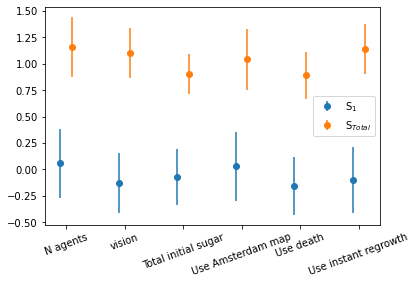

In [8]:
# Perform analysis
Si = sobol.analyze(problem, ginis, print_to_console=True, calc_second_order=False)

# # Print the first-order sensitivity indices
# print(Si['S1'])

S1 = Si['S1']
S1_conf = Si['S1_conf']

ST = Si['ST']
ST_conf = Si['ST_conf']

# print(S1, "\n", S1_conf)
# S1 = [1, 2, 3]
# S1_conf = [0.5, 0.4, 0.3]

plt.errorbar([val - 0.1 for val in np.arange(len(S1))], S1, yerr=S1_conf, fmt='o', label = r"S$_{1}$")
plt.errorbar([val + 0.1 for val in np.arange(len(ST))], ST, yerr=ST_conf, fmt='o', label = "S$_{Total}$")
plt.xticks(np.arange(len(S1)), problem["names"], rotation=20)
plt.legend()
plt.show()